#Proyecto de Predicción de Cancelaciones de Reservas de Hotel




##Introducción



*   **Objetivo del Proyecto:** Comprender y predecir las cancelaciones de reservas de hotel.

*   **Motivación:** Las cancelaciones de reservas pueden tener un impacto significativo en la industria hotelera. Predecir las cancelaciones puede ayudar a optimizar la gestión de habitaciones y recursos


##Preguntas de Investigación

Preguntas Generales:



*   ¿Cuáles son los factores más influyentes en las cancelaciones de reservas de hotel?
*   ¿Qué efecto tienen las políticas de cancelación en las decisiones de los huéspedes?

##Preguntas Basadas en Características Seleccionadas:

*  ¿Cómo afecta la antelación de la reserva a la probabilidad de cancelación de reservas de hotel?

*  ¿Existe una relación entre la tarifa media diaria y las cancelaciones de reservas de hotel?

*  ¿Cómo influye la presencia o ausencia de un depósito previo en las cancelaciones de reservas de hotel?

*  ¿Existen patrones de cancelación específicos para ciertos tipos de habitaciones reservadas en hoteles?


##Metodología

*  Adquisición de Datos: Utilizaremos datos de reservas de hotel que incluyen información sobre características de las reservas y cancelaciones.

*  Análisis de Datos: Exploraremos y visualizaremos los datos para identificar patrones y relaciones.

*  Modelo Predictivo: Desarrollaremos un modelo de regresión logística para predecir cancelaciones basado en las características seleccionadas.

*  Evaluación del Modelo: Mediremos la precisión y el rendimiento del modelo en la predicción de cancelaciones.

##Preguntas de Investigación Específicas

Preguntas Basadas en Características Seleccionadas:

*   ¿Cómo afecta la antelación de la reserva a la probabilidad de cancelación de reservas de hotel?

*   ¿Existe una relación entre la tarifa media diaria y las cancelaciones de reservas de hotel?

*   ¿Cómo influye la presencia o ausencia de un depósito previo en las cancelaciones de reservas de hotel?

*   ¿Existen patrones de cancelación específicos para ciertos tipos de habitaciones reservadas en hoteles?

##Conclusiones y Resultados Esperados

*   Esperamos identificar factores clave que influyen en las cancelaciones de reservas de hotel.

*   Nuestro modelo predictivo ayudará a predecir futuras cancelaciones y optimizar la gestión de reservas.

*   Proporcionaremos información valiosa para la toma de decisiones en la industria hotelera.

##Próximos Pasos

1.  Adquisición y preparación de datos.
2.  Análisis exploratorio de datos.
3.  Desarrollo y evaluación del modelo predictivo.
4.  Presentación de resultados y conclusiones


Esta presentación proporciona una visión general de nuestro proyecto de predicción de cancelaciones de reservas de hotel y establece las preguntas de investigación que abordaremos. A medida que avanzamos en el proyecto, profundizaremos en cada una de estas áreas y presentaremos los resultados obtenidos.

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as  sns
import sklearn as sk
import numpy as np
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Adquisición de datos

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
df = pd.read_csv('/content/drive/MyDrive/ENTREGABLES-CODER/ENTREGABLES/Entrega-PROYECTO FINAL/hotel_bookings_spanish.csv', sep=';', encoding='latin-1')

<br>

#Análisis exploratorio de datos

<br>



In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   hotel tipo                                                      119390 non-null  object 
 1   La reserva fue cancelada (1) / La reserva no fue cancelada (0)  119390 non-null  int64  
 2   Dias transcurridos entre la reserva y la fecha de llegada       119390 non-null  int64  
 3   Año de arribo                                                   119390 non-null  int64  
 4   Mes de arribo                                                   119390 non-null  object 
 5   Semana de arribo                                                119390 non-null  int64  
 6   Dia de arribo                                                   119390 non-null  int64  
 7   Noches de fin de semana que se hospedo

Vemos que es una dataset basante más limpio de lo que se esperaba, hay algunos datos faltantes en la columna  "deposito previo" pero no pareciera ser una cantidad significativa. De momento no haremos modificaciones en ello.

In [176]:
df.describe()

,La reserva fue cancelada (1) / La reserva no fue cancelada (0),Dias transcurridos entre la reserva y la fecha de llegada,Año de arribo,Semana de arribo,Dia de arribo,Noches de fin de semana que se hospedo,Noches de la semana que se hospedo,adultos,Niños,bebes,huésped repetido (1) / No era un huésped repetido (0),Cancelaciones previas,Reservas previas no canceladas,Cambios en reserva,deposito previo,días que la reserva estuvo en la lista de espera,tarifa media diaria,plazas de aparcamiento,peticiones especiales realizadas
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


Bien, primer análisis descriptivo básico de nuestros datos.
Hay algunos indicios de que podríamos tener outliers o valores atípicos en algunas columnas como "Dias transcurridos entre la reserva y la fecha de llegada" donde parece que la mediana está algo alejada de la media.
En otras columnas como "tarifa media diaria" encontramos un valor minimo negativo.

In [177]:
pd.set_option('display.max_columns', None)
(df.head(5))

,hotel tipo,La reserva fue cancelada (1) / La reserva no fue cancelada (0),Dias transcurridos entre la reserva y la fecha de llegada,Año de arribo,Mes de arribo,Semana de arribo,Dia de arribo,Noches de fin de semana que se hospedo,Noches de la semana que se hospedo,adultos,Niños,bebes,Tipo de comida reservada,Pais,Designación del segmento de mercado,Canal de distribución de reservas.,huésped repetido (1) / No era un huésped repetido (0),Cancelaciones previas,Reservas previas no canceladas,tipo de habitación reservada,Código del tipo de habitación,Cambios en reserva,deposito previo,días que la reserva estuvo en la lista de espera,tipo de reserva,tarifa media diaria,plazas de aparcamiento,peticiones especiales realizadas,Estado de la última reserva,Fecha
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,304.0,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,240.0,0,Transient,98.0,0,1,Check-Out,03/07/2015


Veamos las 5 primeras posiciones de todas las columnas para ver con qué nos encontramos y que tipo de dato quizás podría estar erróneo

#Visualizaciones
##Target

Definimos a la columna **La reserva fue cancelada (1) / La reserva no fue cancelada (0)** como nuestra variable target representada de una forma claramente binaria













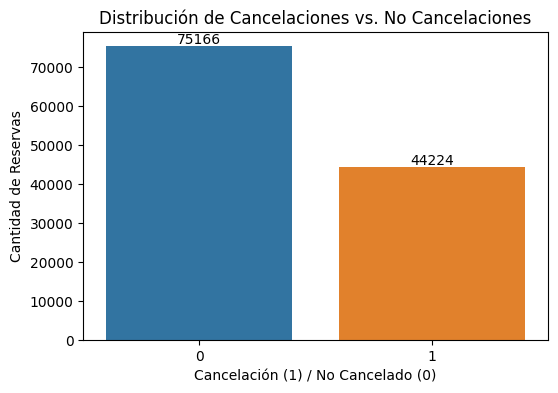

In [178]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='La reserva fue cancelada (1) / La reserva no fue cancelada (0)')
plt.xlabel('Cancelación (1) / No Cancelado (0)')
plt.ylabel('Cantidad de Reservas')
plt.title('Distribución de Cancelaciones vs. No Cancelaciones')
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()


Bien, 75.166 reservas canceladas que representan el 63% del total de los datos. Estos datos vamos a utilizarnos en nuestro análisis.

##Features



*   Dias transcurridos entre la reserva y la fecha de llegada
*   Tarifa media diaria
*   Deposito previo
*   tipo de habitación reservada
*   País
*   Cancelaciones Previas
*   Estado de la última reserva
*   Designación del segmento de mercado
*   días que la reserva estuvo en la lista de espera






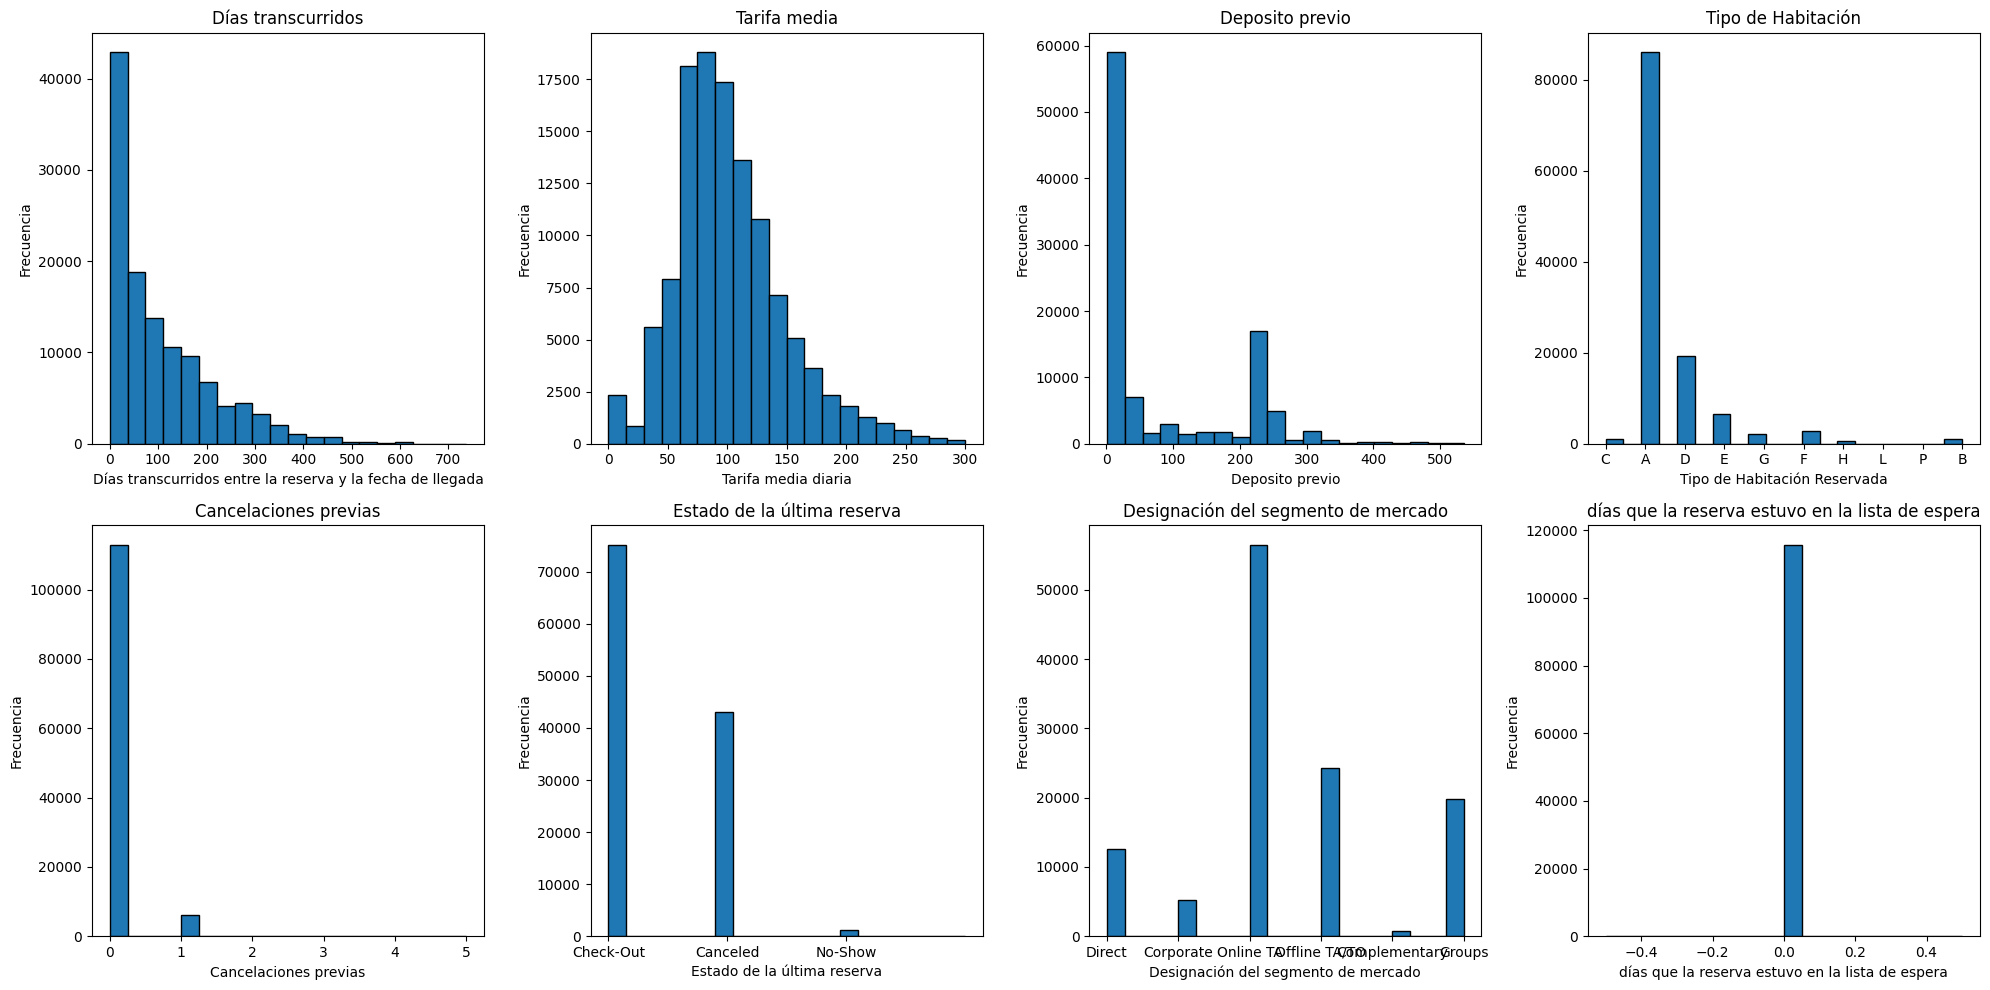

In [179]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].hist(df['Dias transcurridos entre la reserva y la fecha de llegada'], bins=20, edgecolor='k')
axes[0, 0].set_xlabel('Días transcurridos entre la reserva y la fecha de llegada')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Días transcurridos')

axes[0, 1].hist(df['tarifa media diaria'], bins=20, edgecolor='k', range=(0, 300))
axes[0, 1].set_xlabel('Tarifa media diaria')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Tarifa media')

axes[0, 2].hist(df['deposito previo'], bins=20, edgecolor='k')
axes[0, 2].set_xlabel('Deposito previo')
axes[0, 2].set_ylabel('Frecuencia')
axes[0, 2].set_title('Deposito previo')

axes[0, 3].hist(df['tipo de habitación reservada'], bins=20, edgecolor='k')
axes[0, 3].set_xlabel('Tipo de Habitación Reservada')
axes[0, 3].set_ylabel('Frecuencia')
axes[0, 3].set_title('Tipo de Habitación')

axes[1, 0].hist(df['Cancelaciones previas'], bins=20, edgecolor='k', range=(0, 5))
axes[1, 0].set_xlabel('Cancelaciones previas')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Cancelaciones previas')

axes[1, 1].hist(df['Estado de la última reserva'], bins=20, edgecolor='k', range=(0, 3))
axes[1, 1].set_xlabel('Estado de la última reserva')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Estado de la última reserva')

axes[1, 2].hist(df['Designación del segmento de mercado'], bins=20, edgecolor='k', range=(0, 5))
axes[1, 2].set_xlabel('Designación del segmento de mercado')
axes[1, 2].set_ylabel('Frecuencia')
axes[1, 2].set_title('Designación del segmento de mercado')

axes[1, 3].hist(df['días que la reserva estuvo en la lista de espera'], bins=20, edgecolor='k', range=(0, 0))
axes[1, 3].set_xlabel('días que la reserva estuvo en la lista de espera')
axes[1, 3].set_ylabel('Frecuencia')
axes[1, 3].set_title('días que la reserva estuvo en la lista de espera')

plt.tight_layout()
plt.show()



Claramente vemos algunos valores atípicos en la columna 'Dias transcurridos entre la reserva y la fecha de llegada' que serán tratados en la limpieza de datos.

En cuanto a tarifa media diara, una marcada connotación entre los 50 y 150.

La gran mayoría de nuestras reservas no aporta depósito previo.

La habitación de tipo A es la habitación elegida por la gran mayoría

#Limpieza de datos

In [180]:
valores_faltantes_por_columna = df.isnull().sum()
print(valores_faltantes_por_columna)

hotel tipo                                                            0
La reserva fue cancelada (1) / La reserva no fue cancelada (0)        0
Dias transcurridos entre la reserva y la fecha de llegada             0
Año de arribo                                                         0
Mes de arribo                                                         0
Semana de arribo                                                      0
Dia de arribo                                                         0
Noches de fin de semana que se hospedo                                0
Noches de la semana que se hospedo                                    0
adultos                                                               0
Niños                                                                 4
bebes                                                                 0
Tipo de comida reservada                                              0
Pais                                                            

Bien, detectamos que tenemos 3 columnas con valores faltantes. 'Niños', 'Pais', 'deposito previo'

Vamos a trabajar los faltantes de dichas columnas

In [181]:
df['Niños'].fillna(0, inplace=True)
df['deposito previo'].fillna(df['deposito previo'].median(), inplace=True)

df['Pais'].fillna('Desconocido', inplace=True)

Realiza la imputación para las columnas 'Niños' y 'deposito previo' y luego elimina las filas que tienen valores faltantes en la columna 'Pais'.

## Analizamos los features

###Variable: Dias transcurridos entre la reserva y la fecha de llegada

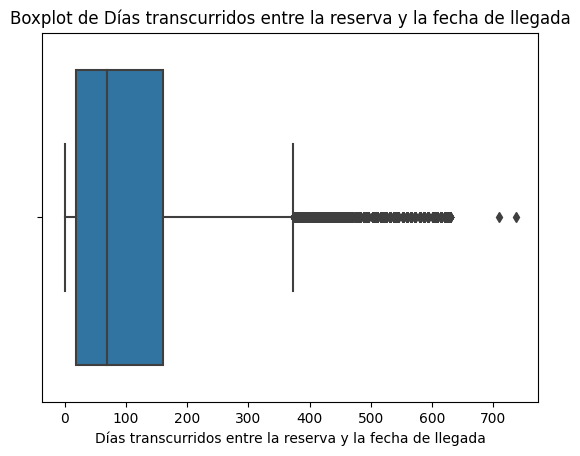

In [182]:
sns.boxplot(x=df['Dias transcurridos entre la reserva y la fecha de llegada'])
plt.xlabel('Días transcurridos entre la reserva y la fecha de llegada')
plt.title('Boxplot de Días transcurridos entre la reserva y la fecha de llegada')

plt.show()


Hay un número importante de outliers o valores atípicos en esta variable. No nos parecen lógicas que hayan reservas superiores a 180 días.
Primero vamos a ver cuantos datos representan a reservas mayores a 180 días para continuar con el siguiente paso.

In [183]:
reservas_atipicas = df[df['Dias transcurridos entre la reserva y la fecha de llegada'] > 180]
cantidad_reservas_atipicas = len(reservas_atipicas)

print("Cantidad de reservas con más de 180 días de anticipación:", cantidad_reservas_atipicas)


Cantidad de reservas con más de 180 días de anticipación: 24692


Estos valores atípicos de nuestro análisis representan cerca de un 20% de los datos. No es una cantidad significativa y puede afectar al modelo.
Vamos a proceder a eliminarlos en el siguiente código.

In [184]:
# Se establece el umbral de 180 días
umbral = 180
df = df[df['Dias transcurridos entre la reserva y la fecha de llegada'] <= umbral]


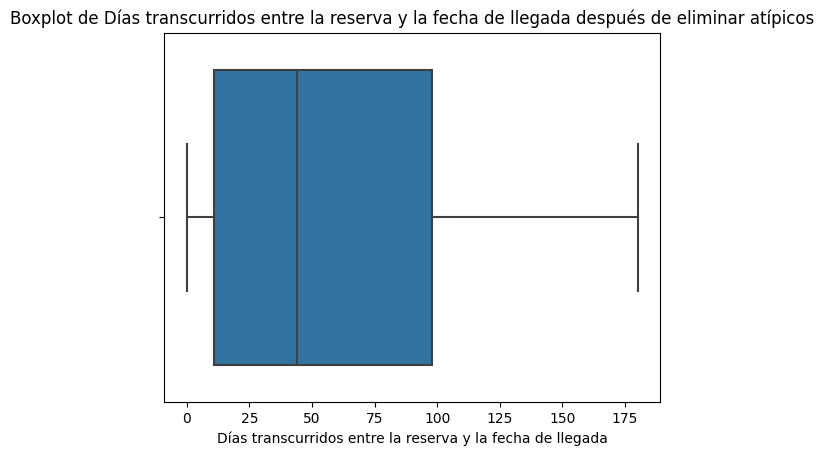

In [185]:
sns.boxplot(x=df['Dias transcurridos entre la reserva y la fecha de llegada'])
plt.xlabel('Días transcurridos entre la reserva y la fecha de llegada')
plt.title('Boxplot de Días transcurridos entre la reserva y la fecha de llegada después de eliminar atípicos')

plt.show()


Es evidente que la mayoría de los datos se concentran en los primeros dos cuartiles, especialmente en el rango de 0 a 50 días. Esto significa que la mayoría de las reservas se realizan con un período de anticipación de hasta 50 días, lo cual es bastante común para reservas de hoteles. Sin embargo, también hay algunas reservas que se realizan con un período de anticipación bastante largo, hasta 180 días, lo cual es menos común pero aún posible.

Dado que el rango de 0 a 180 días cubre la mayoría de los datos y tiene sentido en el contexto de reservas de hotel, no parece que haya un problema importante con esta variable. De momento, no haremos ajuste en ésta variable.

Variable: tarifa media diaria

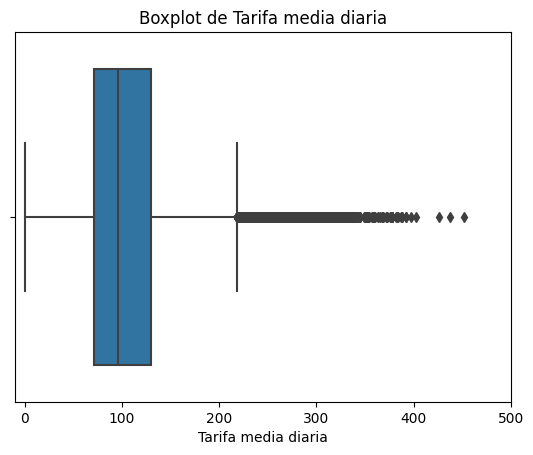

In [186]:
sns.boxplot(x=df['tarifa media diaria'])
plt.xlim(-10, 500)
plt.xlabel('Tarifa media diaria')
plt.title('Boxplot de Tarifa media diaria')

plt.show()


In [187]:
valores_superiores_200 = len(df[df['tarifa media diaria'] > 200])

print(f"Número de valores en 'tarifa media diaria' superiores a 200: {valores_superiores_200}")


Número de valores en 'tarifa media diaria' superiores a 200: 4511


In [188]:
umbral = 200
df = df[df['tarifa media diaria'] <= umbral]

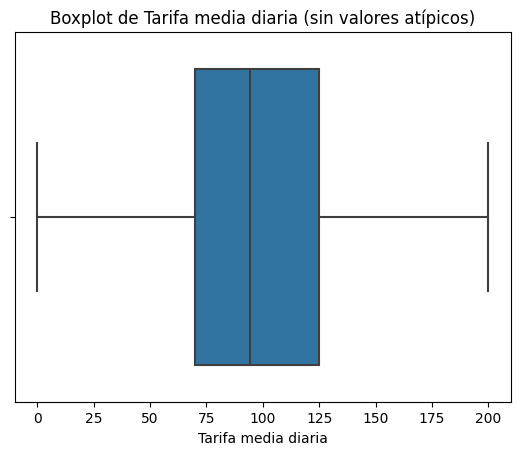

In [189]:
sns.boxplot(x=df['tarifa media diaria'])
plt.xlabel('Tarifa media diaria')
plt.title('Boxplot de Tarifa media diaria (sin valores atípicos)')

plt.show()




El proceso que hemos realizado fue de analizar primero, cuantos valores atípicos tenemos en esta variable, al resultar un número significativamente bajo, establecimos el umbral en 200.

Variable: Deposito previo

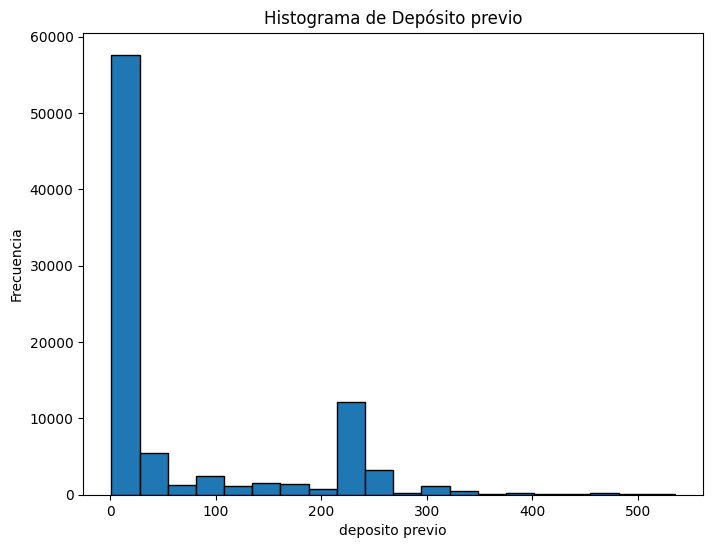

In [190]:
plt.figure(figsize=(8, 6))
plt.hist(df['deposito previo'], bins=20, edgecolor='k')
plt.xlabel('deposito previo')
plt.ylabel('Frecuencia')
plt.title('Histograma de Depósito previo')
plt.show()


Variable: tipo de habitación reservada

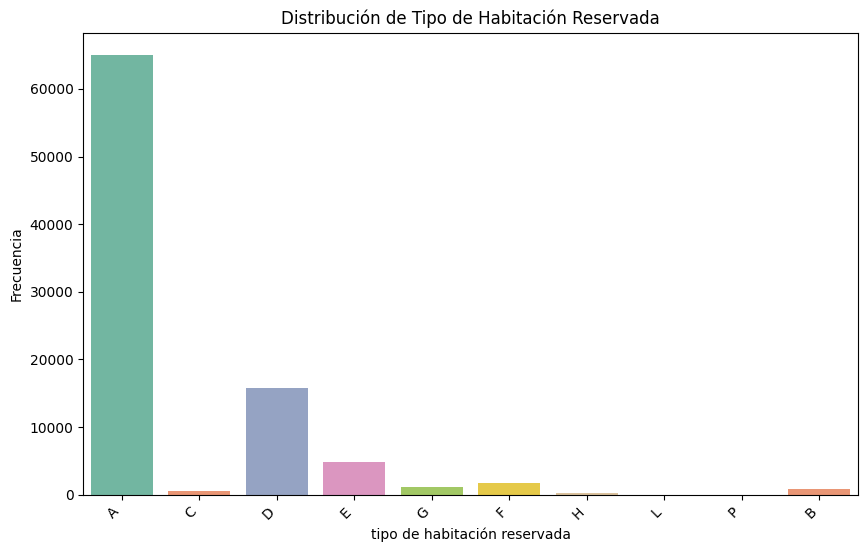

In [191]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tipo de habitación reservada', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('tipo de habitación reservada')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipo de Habitación Reservada')
plt.show()

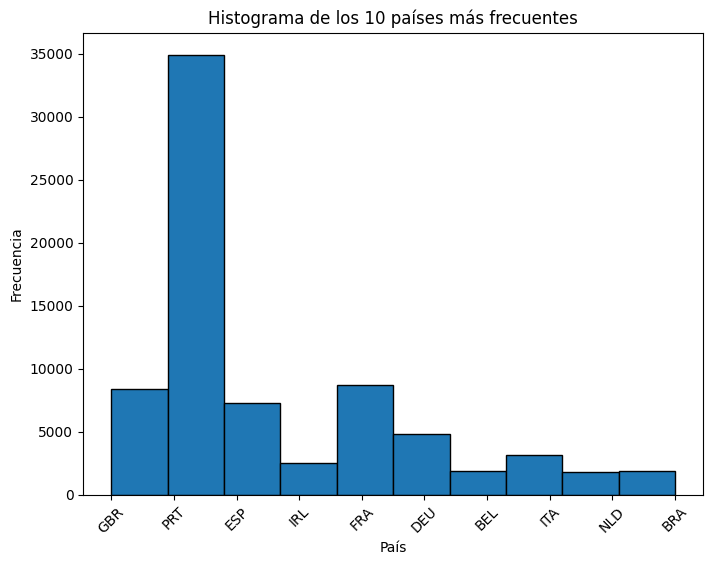

In [192]:
top_10_paises = df['Pais'].value_counts().nlargest(10)

top_10_df = df[df['Pais'].isin(top_10_paises.index)]

# Generar el histograma para los 10 países más frecuentes
plt.figure(figsize=(8, 6))
plt.hist(top_10_df['Pais'], bins=10, edgecolor='k')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Histograma de los 10 países más frecuentes')
plt.xticks(rotation=45)
plt.show()


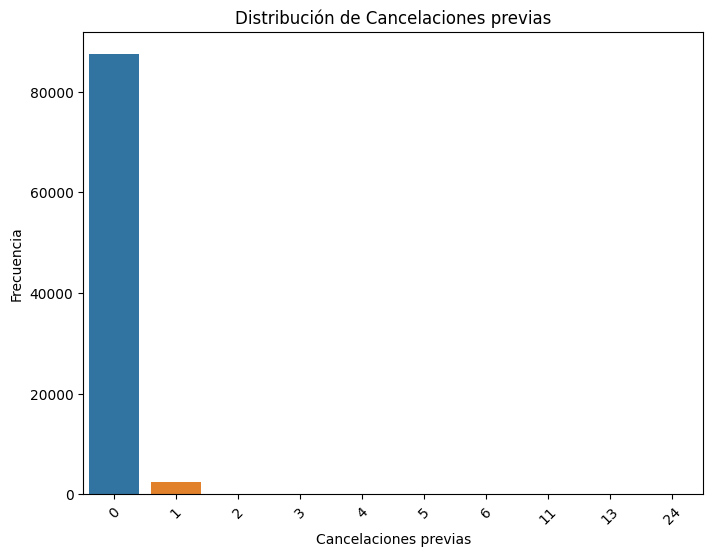

In [193]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cancelaciones previas')
plt.xlabel('Cancelaciones previas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cancelaciones previas')
plt.xticks(rotation=45)
plt.show()


In [194]:
df['días que la reserva estuvo en la lista de espera'].describe()


count    90187.000000
mean         1.090634
std          8.449619
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        142.000000
Name: días que la reserva estuvo en la lista de espera, dtype: float64

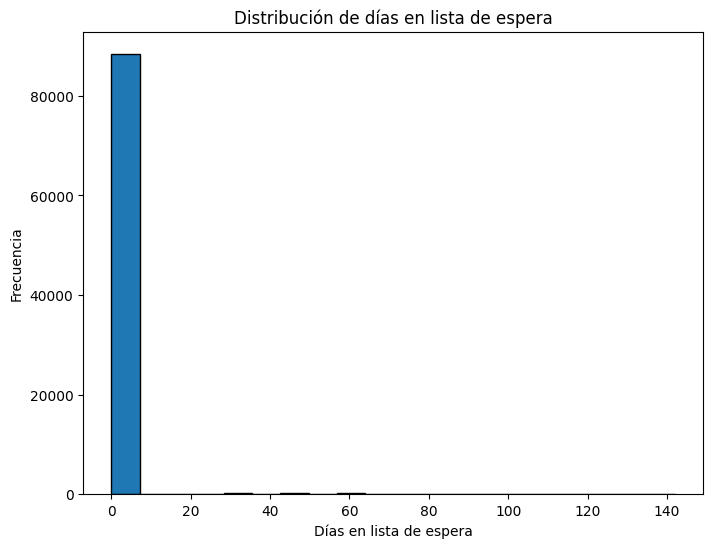

In [195]:
plt.figure(figsize=(8, 6))
plt.hist(df['días que la reserva estuvo en la lista de espera'], bins=20, edgecolor='k')
plt.xlabel('Días en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Distribución de días en lista de espera')
plt.show()


#Desarrollo y evaluación del modelo predictivo

##Matriz de correlación

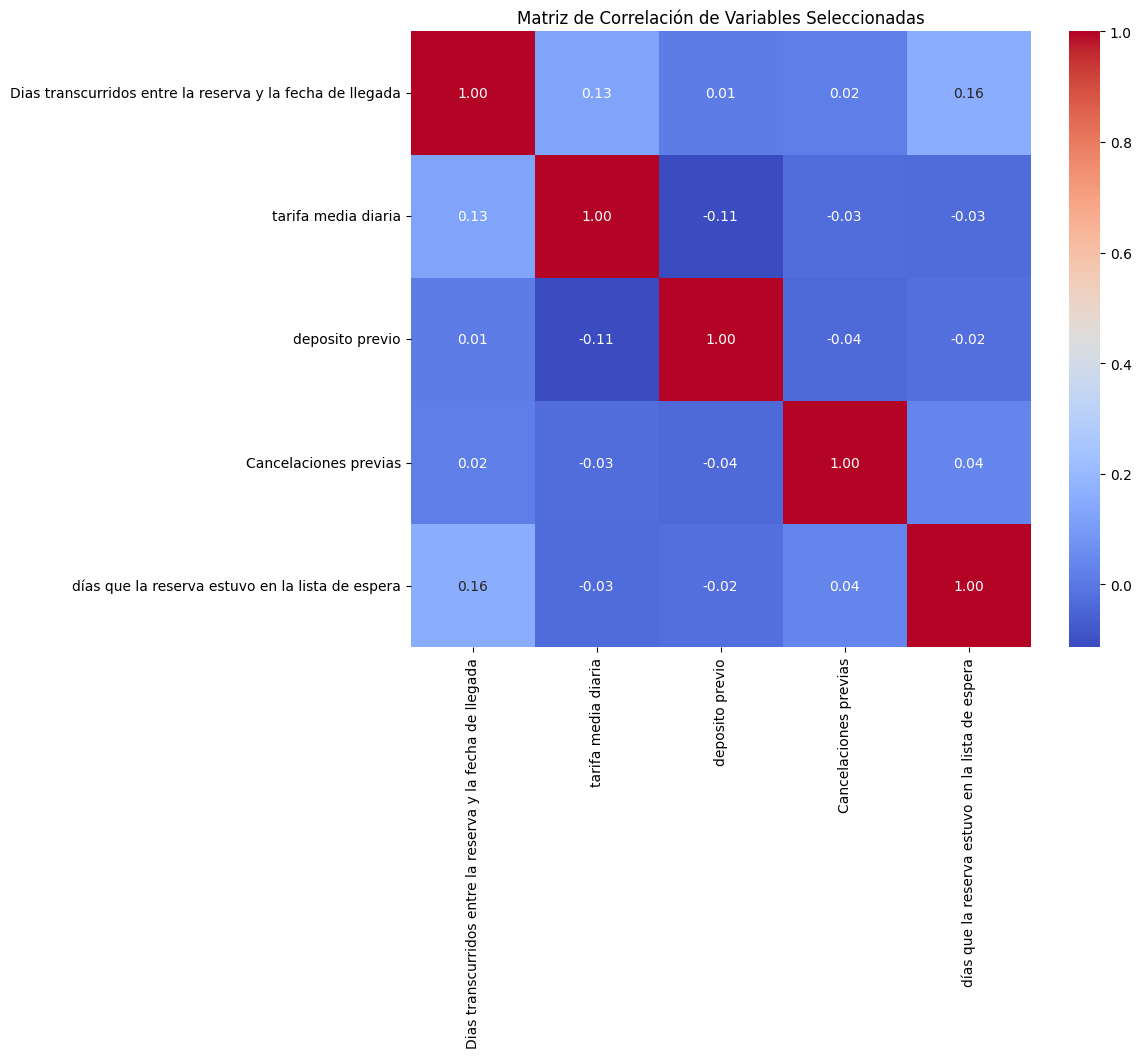

In [196]:
cols_of_interest = [
    'Dias transcurridos entre la reserva y la fecha de llegada',
    'tarifa media diaria',
    'deposito previo',
    'tipo de habitación reservada',
    'Pais',
    'Cancelaciones previas',
    'Estado de la última reserva',
    'Designación del segmento de mercado',
    'días que la reserva estuvo en la lista de espera'
]

# Creamos un DataFrame con las columnas seleccionadas
selected_cols_df = df[cols_of_interest]

# Calculamos la matriz de correlación
correlation_matrix = selected_cols_df.corr()

# Creampos un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables Seleccionadas')
plt.show()



##ENCODING

Continuamos realizando codificación de variables categóricas.
En este caso para el 'tipo de habitación reservada'

In [197]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

df_copia = df.copy()  # Crear una copia del DataFrame original
df_copia['tipo de habitación codificada'] = label_encoder.fit_transform(df_copia['tipo de habitación reservada'])

print(df_copia[['tipo de habitación reservada', 'tipo de habitación codificada']].head())


  tipo de habitación reservada  tipo de habitación codificada
2                            A                              0
3                            A                              0
4                            A                              0
5                            A                              0
6                            C                              2


In [198]:

conteo_codigos = df_copia['tipo de habitación codificada'].value_counts()

# Mostrar el conteo de cada valor codificado
print(conteo_codigos)


0    65049
3    15723
4     4772
5     1803
6     1130
1      799
2      565
7      328
9       12
8        6
Name: tipo de habitación codificada, dtype: int64



##Continuamos con la siguiente variable, Esado de la ultima reserva

In [199]:
datos_estado_reserva = df['Estado de la última reserva'].value_counts()

# Mostrar los datos únicos y su frecuencia
print(datos_estado_reserva)

Check-Out    61721
Canceled     27366
No-Show       1100
Name: Estado de la última reserva, dtype: int64


No-Show corresponde a habitaciones que se han reservado y no se utilizaron por lo que podria infereir en politicas de cancelaciones.

In [200]:
label_encoder_estado_reserva = LabelEncoder()

# Aplicar Label Encoding a la columna 'Estado de la última reserva'
df_copia['estado_reserva_codificado'] = label_encoder_estado_reserva.fit_transform(df_copia['Estado de la última reserva'])

# Mostrar las primeras filas del DataFrame con la columna codificada
print(df_copia[['Estado de la última reserva', 'estado_reserva_codificado']].head())


  Estado de la última reserva  estado_reserva_codificado
2                   Check-Out                          1
3                   Check-Out                          1
4                   Check-Out                          1
5                   Check-Out                          1
6                   Check-Out                          1


In [201]:
label_encoder = LabelEncoder()
df['estado_reserva_codificado'] = label_encoder.fit_transform(df['Estado de la última reserva'])


##Codificación de la variable Canal de distribución de reservas

In [202]:
# Mostrar los datos únicos y su frecuencia en la columna 'Canal de distribución de reservas'
datos_canal_distribucion = df['Canal de distribución de reservas.'].value_counts()

# Mostrar los datos únicos y su frecuencia
print(datos_canal_distribucion)


TA/TO        71679
Direct       12237
Corporate     6078
GDS            188
Undefined        5
Name: Canal de distribución de reservas., dtype: int64


In [203]:
# diccionario con el mapeo de las categorías y sus conteos
canal_distribucion = {
    'TA/TO': 4,
    'Direct': 3,
    'Corporate': 2,
    'GDS': 1,
    'Undefined': 0
}

# Aplicar el mapeo usando el método replace
df['canal_codificado'] = df['Canal de distribución de reservas.'].replace(canal_distribucion)


##Veamos ahora 'Designación del segmento de mercado' para su codificación


In [204]:
# Contar las ocurrencias de cada categoría en 'Designación del segmento de mercado'
segmento_mercado_counts = df['Designación del segmento de mercado'].value_counts()

# Mostrar el conteo de cada categoría
print(segmento_mercado_counts)


Online TA        45751
Offline TA/TO    16881
Direct           10701
Groups           10636
Corporate         5240
Complementary      739
Aviation           237
Undefined            2
Name: Designación del segmento de mercado, dtype: int64


In [205]:
# Crear un diccionario con el mapeo de las categorías y sus conteos
segmento_mercado = {
    'Online TA': 6,
    'Offline TA/TO': 5,
    'Direct': 4,
    'Groups': 3,
    'Corporate': 2,
    'Complementary': 1,
    'Aviation': 0,
    'Undefined': -1  # Puedes elegir mantenerlo como 'Undefined' o asignar otro valor
}

# Aplicar el mapeo usando el método replace
df['segmento_mercado_codificado'] = df['Designación del segmento de mercado'].replace(segmento_mercado)



In [206]:
# Mostrar las primeras filas del DataFrame con la nueva columna codificada
print(df[['Designación del segmento de mercado', 'segmento_mercado_codificado']].head())


  Designación del segmento de mercado  segmento_mercado_codificado
2                              Direct                            4
3                           Corporate                            2
4                           Online TA                            6
5                           Online TA                            6
6                              Direct                            4


#Estandarización/Normalización de datos:
"Preparación de datos: Estandarización/Normalización"

In [207]:
columnas_modelo = [
    'Dias transcurridos entre la reserva y la fecha de llegada',
    'tarifa media diaria',
    'deposito previo',
    'Cancelaciones previas',
    'días que la reserva estuvo en la lista de espera',
    'canal_codificado',
    'segmento_mercado_codificado',
    'estado_reserva_codificado',
]

#DataFrame solo con las columnas seleccionadas para el modelo
df_modelo = df[columnas_modelo]



#Random Forest

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#columnas que usaremos como características en el modelo
columnas_modelo = [
    'Dias transcurridos entre la reserva y la fecha de llegada',
    'tarifa media diaria',
    'deposito previo',
    'Cancelaciones previas',
    'días que la reserva estuvo en la lista de espera',
    'canal_codificado',
    'segmento_mercado_codificado',
    'estado_reserva_codificado',
]

df_modelo = df[columnas_modelo]

#características (X) y variable objetivo (y)
X = df_modelo
y = df['La reserva fue cancelada (1) / La reserva no fue cancelada (0)']

parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    # Otros parámetros específicos del modelo Random Forest
}

modelo_rf = RandomForestClassifier()

grid_search = GridSearchCV(modelo_rf, parametros, cv=5, scoring='accuracy')
grid_search.fit(X, y)

mejores_hiperparametros = grid_search.best_params_


In [209]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)


{'max_depth': None, 'n_estimators': 50}
RandomForestClassifier(n_estimators=50)
1.0


Un puntaje de 1.0 en la validación cruzada puede indicar sobreajuste, lo que significa que el modelo puede estar demasiado adaptado a los datos de entrenamiento y podría no generalizar bien con nuevos datos. Sería útil evaluar el modelo en un conjunto de datos de prueba independiente para confirmar su rendimiento real.

In [210]:
from sklearn.model_selection import train_test_split

# Tomamos las columnas seleccionadas para el modelo
columnas_modelo = [
    'Dias transcurridos entre la reserva y la fecha de llegada',
    'tarifa media diaria',
    'deposito previo',
    'Cancelaciones previas',
    'días que la reserva estuvo en la lista de espera',
    'canal_codificado',
    'segmento_mercado_codificado',
    'estado_reserva_codificado',
]

# DataFrame solo con las columnas seleccionadas para el modelo
df_modelo = df[columnas_modelo]

# Features y etiquetas
X = df_modelo.values
y = df['La reserva fue cancelada (1) / La reserva no fue cancelada (0)'].values

# División en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
# Inicializar el modelo con los hiperparámetros encontrados
model = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir en el conjunto de entrenamiento y de prueba
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calcular la precisión del modelo en los conjuntos de entrenamiento y prueba
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.4f}')
print(f'Precisión en conjunto de prueba: {test_accuracy:.4f}')


Precisión en conjunto de entrenamiento: 1.0000
Precisión en conjunto de prueba: 1.0000


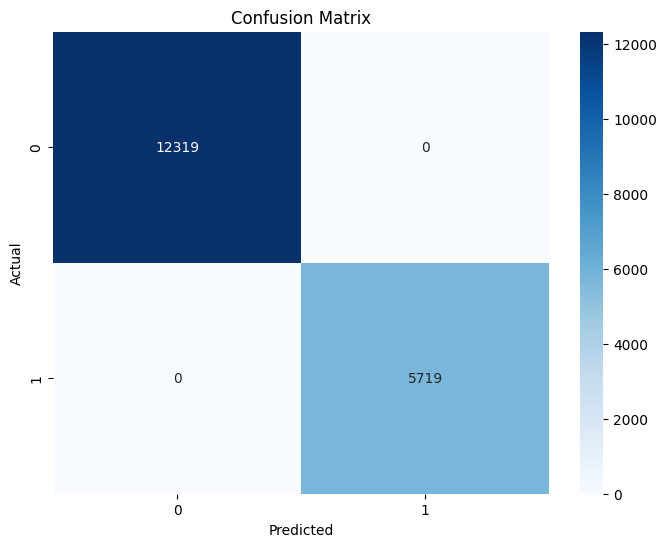

In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo RandomForestClassifier (reemplaza X_train, y_train con tus datos)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Verdaderos positivos (TP, 1 y 1): 5,719

Verdaderos negativos (TN, 0 y 0): 12,319

Falsos positivos (FP, 0 y 1): 0

Falsos negativos (FN, 1 y 0): 0


Esto indica que el modelo predijo correctamente 5,719 instancias como positivas y 12,319 como negativas. No se cometieron errores en la predicción de falsos positivos ni falsos negativos en el conjunto de prueba. Tener valores no nulos en las posiciones (0 y 1) o (1 y 0) indicaría errores en la predicción de clases positivas o negativas, respectivamente. En este caso, parece que el modelo tuvo un rendimiento perfecto según la matriz de confusión.



Parece que el modelo de Random Forest tuvo una precisión de 1.0 tanto en el conjunto de entrenamiento como en el conjunto de prueba, lo que indica que el modelo predice perfectamente la variable objetivo en estos datos.
Aunque, puede significar un caso muy probable de sobre ajuste al ser 1

Sin embargo, al revisar la matriz de confusión, observamos que hay predicciones en los cuatro cuadrantes, con una cantidad considerable de predicciones correctas en el cuadrante (0,0) y (1,1), mientras que los demás tienen un valor de 0. Esto sugiere la necesidad de una evaluación más detallada y un posible análisis adicional del modelo para comprender mejor su desempeño y asegurarse de que no haya un sobreajuste o algún otro problema.

#Regresión Logística

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir el conjunto de datos en entrenamiento y prueba (usualmente 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000)  # Puedes ajustar los hiperparámetros según sea necesario
logistic_model.fit(X_train, y_train)

# Obtener predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en conjunto de prueba: {accuracy:.4f}")

# Otras métricas y matriz de confusión
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)


Precisión en conjunto de prueba: 0.9875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12319
           1       1.00      0.96      0.98      5719

    accuracy                           0.99     18038
   macro avg       0.99      0.98      0.99     18038
weighted avg       0.99      0.99      0.99     18038

Matriz de Confusión:
[[12319     0]
 [  225  5494]]


En general, el modelo parece funcionar muy bien con una precisión alta y buenos valores en las otras métricas. Es esencial tener en cuenta el balance entre precision y recall dependiendo del problema real y las consecuencias de los falsos positivos y falsos negativos.

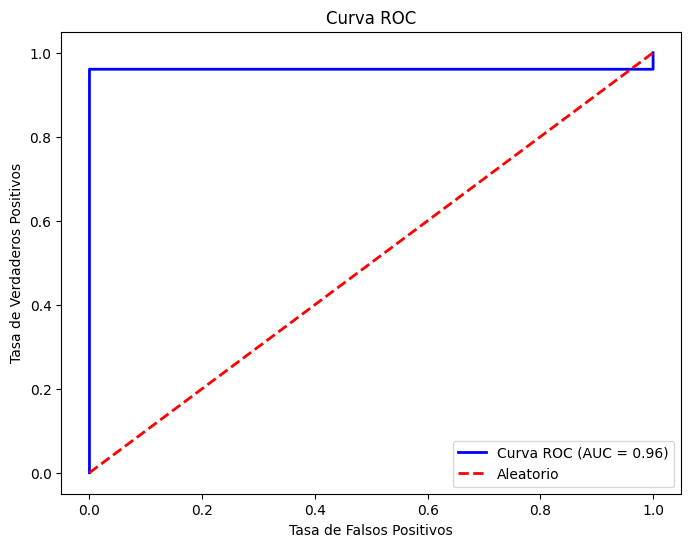

In [214]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de las predicciones positivas
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


#Evaluación de datos ficticios

In [215]:
from sklearn.metrics import fbeta_score

# Calcula la puntuación Fbeta con beta = 0.5
puntuacion_fbeta = fbeta_score(y_test, y_pred, beta=0.5)

print("Puntuación Fbeta (beta=0.5):", puntuacion_fbeta)



Puntuación Fbeta (beta=0.5): 0.9918757898537643


In [216]:
# Eliminar las dos características adicionales ('caracteristica_extra_1' y 'caracteristica_extra_2')
data_ficticia = data_ficticia[['Dias transcurridos entre la reserva y la fecha de llegada',
                               'tarifa media diaria',
                               'deposito previo',
                               'Cancelaciones previas',
                               'días que la reserva estuvo en la lista de espera',
                               'canal_codificado',
                               'segmento_mercado_codificado',
                               'estado_reserva_codificado']]




In [217]:
# Crear un DataFrame con los datos ficticios y sus predicciones
data_ficticia['Prediccion'] = y_pred_ficticios

# Separar los datos según la predicción: clase 0 y clase 1
datos_clase_0 = data_ficticia[data_ficticia['Prediccion'] == 0]
datos_clase_1 = data_ficticia[data_ficticia['Prediccion'] == 1]

# Mostrar la cantidad de datos en cada clase
print("Datos clasificados como clase 0:", len(datos_clase_0))
print("Datos clasificados como clase 1:", len(datos_clase_1))

# Mostrar los primeros datos de cada clase (opcional)
print("\nPrimeros datos clasificados como clase 0:")
print(datos_clase_0.head())

print("\nPrimeros datos clasificados como clase 1:")
print(datos_clase_1.head())


Datos clasificados como clase 0: 25
Datos clasificados como clase 1: 25

Primeros datos clasificados como clase 0:
    Dias transcurridos entre la reserva y la fecha de llegada  \
6                                                  45           
7                                                  33           
8                                                  12           
9                                                  10           
13                                                 17           

    tarifa media diaria  deposito previo  Cancelaciones previas  \
6            263.004646              130                      4   
7            285.354994               47                      2   
8            215.934266               98                      2   
9             98.498389              121                      2   
13           214.301511              165                      0   

    días que la reserva estuvo en la lista de espera  canal_codificado  \
6                

In [218]:
# Estadísticas descriptivas para clase 0
descripcion_clase_0 = datos_clase_0.describe()

# Estadísticas descriptivas para clase 1
descripcion_clase_1 = datos_clase_1.describe()

print("Estadísticas descriptivas para clase 0:")
print(descripcion_clase_0)

print("\nEstadísticas descriptivas para clase 1:")
print(descripcion_clase_1)


Estadísticas descriptivas para clase 0:
       Dias transcurridos entre la reserva y la fecha de llegada  \
count                                          25.000000           
mean                                           19.600000           
std                                            11.944315           
min                                             2.000000           
25%                                            12.000000           
50%                                            16.000000           
75%                                            26.000000           
max                                            45.000000           

       tarifa media diaria  deposito previo  Cancelaciones previas  \
count            25.000000        25.000000              25.000000   
mean            191.854882        97.520000               1.680000   
std              71.103988        55.593105               1.314027   
min              78.676909        15.000000               0.000000 

**Clase 0:**

Hay 25 datos clasificados como clase "0".

La media de los días transcurridos entre la reserva y la fecha de llegada es aproximadamente 19.6, con una desviación estándar de alrededor de 11.94.

La tarifa media diaria promedio es de alrededor de 191.85, con una desviación estándar de aproximadamente 71.10.

En promedio, hubo alrededor de 1.68 cancelaciones previas en esta clase, con un máximo de 4 cancelaciones previas.

La duración media en la lista de espera fue de aproximadamente 4.12 días.


**Clase 1:**

También hay 25 datos clasificados como clase "1".

En esta clase, la media de los días transcurridos entre la reserva y la fecha de llegada es mayor, alrededor de 31.88 días, con una desviación estándar de aproximadamente 13.70.

La tarifa media diaria promedio es menor que en la clase "0", alrededor de 171.
91, con una desviación estándar de aproximadamente 76.24.

El número promedio de cancelaciones previas en esta clase es de alrededor de 2.

##PCA

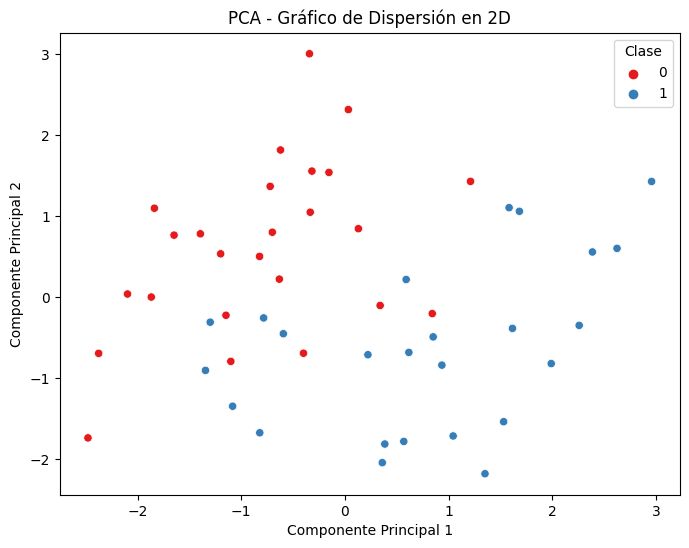

In [219]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estándarizar los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(data_ficticia.drop('Prediccion', axis=1))

# Aplicar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(datos_estandarizados)

# Crear DataFrame con los componentes principales y la clase
pca_df = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])
pca_df['Clase'] = y_pred_ficticios

# Visualizar en un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Clase', data=pca_df, palette='Set1')
plt.title('PCA - Gráfico de Dispersión en 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clase')
plt.show()


Se aprecia una superposición mínima en una regresión 2D. Podrían probarse ingeniería de caracteristicas pero en líneas generales se ve que el modelo responde muy bien.

##Conclusiones

#Resumen del Análisis del Modelo de Regresión Logística

Durante este análisis, se evaluó el rendimiento de un modelo de regresión logística en un conjunto de datos ficticios, complementado con la aplicación de Análisis de Componentes Principales (PCA) para reducir la dimensionalidad y visualizar la separación entre clases.

Evaluación inicial del modelo: Se entrenó un modelo de regresión logística y se evaluó utilizando métricas como la precisión, recall, F1-score y matriz de confusión en el conjunto de prueba.

Análisis de métricas del modelo: Se obtuvo una alta precisión en el conjunto de prueba (0.9875), lo que indica que el modelo predijo correctamente las etiquetas en la mayoría de las instancias. Sin embargo, se observó cierta superposición entre las clases en el espacio reducido de dos dimensiones generado por PCA.

Evaluación de la curva ROC: El área bajo la curva ROC (AUC-ROC) fue alta (0.96), lo que sugiere una buena capacidad de discriminación del modelo entre las clases.

Resultados de PCA: La visualización mediante PCA reveló una superposición leve entre las clases en el espacio bidimensional, mostrando una separación relativamente limitada entre las instancias de diferentes clases.

Conclusiones sobre el Rendimiento del Modelo
Precisiones destacables: El modelo de regresión logística exhibió una alta precisión, lo que indica su capacidad para predecir correctamente las etiquetas en el conjunto de prueba.

Desafíos identificados con PCA: A pesar de la alta precisión, los resultados de PCA mostraron cierta superposición entre las clases, lo que sugiere una separación menos clara en el espacio bidimensional.

Oportunidades de mejora: Para mejorar la separabilidad entre las clases, se sugiere explorar más técnicas de ingeniería de características o considerar otros enfoques para potenciar el rendimiento general del modelo.

En resumen, aunque el modelo de regresión logística mostró un rendimiento prometedor en términos de precisión y AUC-ROC, los resultados de PCA sugieren áreas donde la separación entre clases puede ser mejorada, señalando posibles oportunidades de mejora para el modelo.

